#**Understanding PyTorch library and its working for Machine Learning especially for Deep Learning**

From official page :

It is an *end-to-end machine learning framework*.

PyTorch enables fast, flexible experimentation and efficient production through a user-friendly front-end, distributed training, and ecosystem of tools and libraries.


-----------------------------

Here, we will be going through the basic concepts of PyTorch library along with examples of build machine learning components.

If you already know the concepts related with Numpy or TensorFlow libraries, It will be very easy to understand PyTorch concepts.

For Installing PyTorch, please refer here : https://pytorch.org/get-started/locally/



In [14]:
# importing the PyTorch library
import torch

In [15]:
# Tensors are arrays that are the building blocks of Neural Networks and othe ML Algo.
# Create tensors: Create two 1D/2D tensors A and B of the same size, for example:
A = torch.tensor([1, 2, 3])
B = torch.tensor([[9, 8, 7], [6, 5, 4], [3, 2, 1]], dtype=torch.float32)
print(A)
print(B)
print(A.shape)
print(B.shape)
print(A.ndim)  # dimension of tensor A
print(B.ndim)  # dimension of tensor B
print(A.type)
print(B.dtype)  # data type os tensor B

A = A.type(torch.FloatTensor)  # changing datatype
print(A)

tensor([1, 2, 3])
tensor([[9., 8., 7.],
        [6., 5., 4.],
        [3., 2., 1.]])
torch.Size([3])
torch.Size([3, 3])
1
2
<built-in method type of Tensor object at 0x7b43c5572bb0>
torch.float32
tensor([1., 2., 3.])


In [16]:
# Interoperability with other Python libraries like below.
import numpy

array = numpy.array([1,2,5])
print(array)
C = torch.from_numpy(array)
print(C)
tensor_to_array = C.numpy()
print(tensor_to_array)

[1 2 5]
tensor([1, 2, 5])
[1 2 5]


In [17]:
# Let's explore Basic linear algebra subprogram (BLAS) on these tensors.

# 1. Matrix addition: Add the two tensors A and C (with same dimension)
AC_sum = torch.add(A, C)
print(f'AC_sum: {AC_sum}')

#  Matrix subtraction: Subtract tensor C from tensor A.
AC_sub = torch.sub(A, C)
print(f'AC_sub: {AC_sub}')


# Matrix multiplication: Multiply tensor A(1x3) and tensor B(3x3).
AB_matmul = torch.matmul( A, B)  # gives output (1x3)
AB_mm = torch.mm(A.view(1,3), B)  # needs to converted to matrix shape first
print(f'AB_matmul: {AB_matmul}')
print(f'AB_mm: {AB_mm}')

# Element-wise multiplication: Perform element-wise multiplication between tensor A and tensor C.
AC_mul = torch.mul(A, C)
print(f'AC_sub: {AC_mul}')




AC_sum: tensor([2., 4., 8.])
AC_sub: tensor([ 0.,  0., -2.])
AB_matmul: tensor([30., 24., 18.])
AB_mm: tensor([[30., 24., 18.]])
AC_sub: tensor([ 1.,  4., 15.])


-----------------------------------------------------
Here are some **best practices and common errors** to avoid when implementing basic Linear Algebra Subprogram (**BLAS**) operations in PyTorch:

* **Use appropriate data types:** Ensure that you use the correct data type for your tensors, such as torch.float32 or torch.int32. Mixing data types without proper conversion can lead to unexpected results and errors.

* **Dimensionality:** Make sure that the tensors involved in the operations have compatible shapes. For instance, when performing matrix multiplication, the number of columns in the first matrix should match the number of rows in the second matrix.

* **In-place operations:** PyTorch provides in-place versions of operations (e.g., add_(), sub_(), mul_()) that directly modify the input tensor without creating a new one. Use these carefully, as they may lead to unwanted side effects if not managed properly.

* **Memory management:** Be aware of memory consumption, especially when working with large tensors. Reusing tensors or performing operations in-place can help reduce memory usage.

* **Use GPU acceleration:** PyTorch supports GPU acceleration for tensor operations. To take advantage of this feature, move your tensors to the GPU using the .to() or .cuda() methods.



```
               device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
               A = A.to(device)
               B = B.to(device)
```


* **Error handling:** When implementing BLAS operations, it’s essential to handle exceptions that may arise due to incompatible tensor shapes or data types. Use the try and except statements to catch and handle errors gracefully.

In [18]:
# Implement tensor slicing and indexing
# 1. Indexing
#    Access specific elements in a tensor using indices, similar to Python lists:
element = B[0, 1]  # Access the element at row 0 and column 1
print(f'element: {element}')

# 2. Slicing
#    Slice tensors by specifying a range of indices for each dimension:
sub_tensor = B[1:3, 0:2]  # Extracts the sub-tensor from rows 1 to 2 (inclusive)
                                # and columns 0 to 1 (inclusive)
print(f'sub_tensor: {sub_tensor}')

# Advanced Indexing  (similar to filtering in Dataframe)
# Use integer tensors or boolean masks for more advanced indexing:
mask = B > 5  # Creates a boolean mask where each element is True if the
                      # corresponding element in 'tensor' is greater than 5
result = B[mask]  # Extracts elements from 'tensor' where the corresponding mask element is True
print(f'result: {result}')

element: 8.0
sub_tensor: tensor([[6., 5.],
        [3., 2.]])
result: tensor([9., 8., 7., 6.])


----------------------------------------------------------
When working with **tensor slicing and indexing** in PyTorch, consider the following best practices and common errors:

* **Remember zero-indexing:** In Python and PyTorch, indices start from 0, not 1. Ensure you are using the correct index when accessing tensor elements.

* **Understand slicing ranges:** When slicing, the start index is inclusive, while the end index is exclusive. For example, tensor[0:2] will include elements at indices 0 and 1, but not 2.

* **Preserve dimensions:** When slicing a single row or column, the resulting tensor may have reduced dimensions. To preserve dimensions, use a slice instead of a single index: tensor[1:2, :] instead of tensor[1, :].

* **Avoid in-place operations:** In-place operations, such as **tensor[0, 1] += 1**, can cause issues with PyTorch’s gradient computation. Use tensor = tensor + 1 or **tensor.add_(1)** for safer alternatives.

* **Use advanced indexing cautiously:** Advanced indexing with integer tensors or boolean masks can be powerful but may also introduce complexity and performance overhead. Use simple indexing and slicing when possible, and only resort to advanced techniques when necessary.

* **Ensure correct index data types:** When using integer tensors for advanced indexing, ensure the data type is torch.long or torch.int64. Other data types may cause unexpected behavior.

In [19]:
# Derivatives
# A tensor can be created with requires_grad=True so that torch.autograd records
# operations on them for automatic differentiation

x = torch.tensor(2.0, requires_grad = True)   # tensor with which derivative will be taken
print("x: ", x)
y = x ** 2

y.backward()  # derivative of y is calculated with respect to x  => 2*x

result = x.grad
print(f'result: {result}')

x:  tensor(2., requires_grad=True)
result: 4.0


In [20]:
"""

Behind the scenes, pytorch calculates derivatives by creating a backwards graph.
It is a particular type of graph in which the tensors and the backwards functions
are the nodes in the graph.
Based upon whether a particular tensor is a leaf or not in the graph, pytorch
evaluates the derivative of that tensor. If the leaf attribute for a tensor is set
to True, pytorch won’t evaluate its derivative.

"""

print(" For x")
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("x is_leaf:",x.is_leaf) # derivative not calculated
print("requires_grad:",x.requires_grad)
print("\n")

print("For y")
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

 For x
data: tensor(2.)
grad_fn: None
grad: tensor(4.)
x is_leaf: True
requires_grad: True


For y
data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7b448e283880>
grad: None
is_leaf: False
requires_grad: True


<ipython-input-20-626753339a5b>:23: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print('grad:',y.grad)


In [21]:
# Partial Derivatives
# Here we have a function of two variables or more variables. We will use
# rule of derivative to calculate partial derivative

u = torch.tensor(2.0, requires_grad = True)   # tensor with which derivative will be taken
v = torch.tensor(3.0, requires_grad = True)   # tensor with which derivative will be taken

py = u**2 + 2*u*v + v**2 + u + 3*v + 1

py.backward()   # partial derivative is calculated. w.r.t u => 2*u + 2*v + 1
                                           # w.r.t v  => 2*u + 2*v + 3

u_result = u.grad
v_result = v.grad

print("u_result: ", u_result)
print("v_result: ", v_result)

u_result:  tensor(11.)
v_result:  tensor(13.)


In [22]:
# Custom derivative function class by subclassing torch.autograd.Function and
# implementing the forward and backward passes

class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2   # fixed derivative function
        ctx.save_for_backward(i)  # caching objects in context
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [23]:
sq=SQ.apply

custom_fun = sq(x)
custom_fun.backward()

print(x.grad)

tensor(8.)


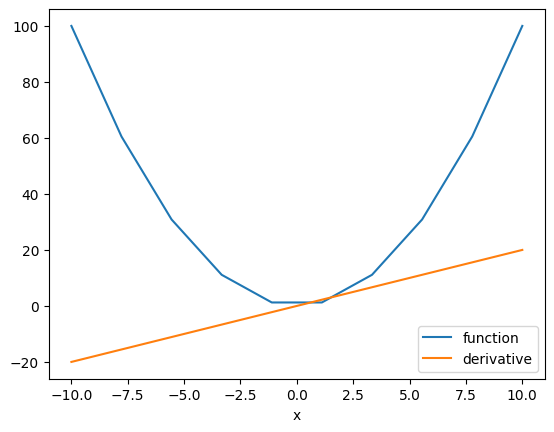

In [24]:
# Calculate the derivative with multiple values
import matplotlib.pyplot as plt

x_lin = torch.linspace(-10, 10, 10, requires_grad = True)
Ym = x_lin ** 2
ym = torch.sum(x_lin ** 2)

ym.backward()

plt.plot(x_lin.detach().numpy(), Ym.detach().numpy(), label = 'function')
plt.plot(x_lin.detach().numpy(), x_lin.grad.detach().numpy(), label = 'derivative')
"""
The method detach() excludes further tracking of operations in the graph, and the subgraph
will not record operations. This allows us to then convert the tensor to a numpy array.
"""
plt.xlabel('x')
plt.legend()
plt.show()

In [27]:
from logging import raiseExceptions
# Creating custom Dataset Class by extending PyTorch Dataset to generate dataset.
# Also, It can handle the transform of the generated dataset

from torch.utils.data import Dataset  # Dataset class
torch.manual_seed(1)  # setting seed value

class get_Dataset(Dataset):

  def __init__(self, length = 100, transform = None) -> None:
    super().__init__()
    self.x = torch.ones(size=(length, 3))
    self.y = torch.ones(size=(length, 1))
    self.len = length
    self.transform = transform

  def __getitem__(self, index):
    if(index < self.len):
      sample = (self.x[index], self.y[index])
      if self.transform:
        sample = self.transform(sample)
      return sample
    else :
      raise Exception("Index out of bound requested")

  def __len__(self):
    return self.len



In [35]:
#Let's create custom Dataset Object.

custom_dataset = get_Dataset()
print("custom dataset: ", custom_dataset)
print("length :", custom_dataset.len)
print("value at index 2: ", custom_dataset[2])

# Dataset object is also an Iterable.
# get the data of dataset while Iterating over it
for xi, yi in custom_dataset:
  print(f'x : {xi}, y: {yi}')
  break



custom dataset:  <__main__.get_Dataset object at 0x7b43bc685ab0>
length : 100
value at index 2:  (tensor([1., 1., 1.]), tensor([1.]))
x : tensor([1., 1., 1.]), y: tensor([1.])


In [47]:
# Lets add Transform function while creating dataset.
# Lets create callable transform class

class simple_transform_one(object):

  def __init__(self, x_transform=2, y_transform = 3):
    self.xf = x_transform
    self.yf = y_transform

  def __call__(self, data):
    x = data[0]
    y = data[1]

    x = x*self.xf + 1
    y = y*self.yf
    sample = x, y
    return sample

In [40]:
transform_obj = simple_transform_one(x_transform=0.5) # creating transform callable object
t_custom_dataset = get_Dataset(transform=transform_obj) # passing transform object
print("value at index 2: ", t_custom_dataset[2])
print("directly transforming value at index 2: ", transform_obj(custom_dataset[2]))

value at index 2:  (tensor([1.5000, 1.5000, 1.5000]), tensor([3.]))
directly transforming value at index 2:  (tensor([1.5000, 1.5000, 1.5000]), tensor([3.]))


In [41]:
# Composing multiple transform functions as a pipeline for dataset

# Run the command below when you do not have torchvision installed
#!mamba install -y torchvision

from torchvision import transforms

In [48]:
class simple_transform_two(object):

  def __init__(self, x_transform=2, y_transform = 3):
    self.xf = x_transform
    self.yf = y_transform

  def __call__(self, data):
    x = data[0]
    y = data[1]

    x = x*self.xf + x*2 + 1
    y = y*self.yf + 1
    sample = x, y
    return sample

In [50]:
# Composing the transform functions into a list form and passing it at once
data_transform = transforms.Compose([simple_transform_one(), simple_transform_two()])
print("The combination of transforms (Compose): ", data_transform)

multiTransform_dataset = get_Dataset(transform=data_transform)
print("value at index 2: ", multiTransform_dataset[2])

The combination of transforms (Compose):  Compose(
)
value at index 2:  (tensor([13., 13., 13.]), tensor([10.]))


In [ ]:
# Creating Dataset class which will fetch data from local storage
# Let's consider image data (containing images of animals with its class) are
# stored in the local storage in csv format.
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os

"""
SL No. |  class name    |  image name
 1     |  dog           | /dataset/train/image_001
 2     |  cat           | /dataset/train/image_002
 3     |  rat           | /dataset/train/image_003
 4     |  dog           | /dataset/train/image_004

"""
# csv path for stored dataset in local drive
dir = ""
csv_file ='index.csv'  #csv file name
csv_path = os.path.join(dir, csv_file)
data_name = pd.read_csv(csv_path)  # reading data from csv file

# 'File name : data_name.iloc[1, 1]   , [row, column]
# 'class name: data_name.iloc[1, 0]

# thus, image path can be found as:
image_path = os.path.join(dir, data_name.iloc[1, 1])

In [52]:
# Custom dataset class to read images one by one without storing all data at once

class Img_Dataset(Dataset):

    def __init__(self, csv_file, data_dir, transform=None):

        # Image directory
        self.data_dir=data_dir

        self.transform = transform

        data_dircsv_file=os.path.join(self.data_dir, csv_file)

        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)

        # Number of images in dataset
        self.len=self.data_name.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, idx):

        # Image file path
        img_name=os.path.join(self.data_dir, self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)

        # The class label for the image
        y = self.data_name.iloc[idx, 0]

        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [ ]:
# Create the dataset objects

imgdataset = Img_Dataset(csv_file=csv_file, data_dir=dir)

In [ ]:
# Combine two transforms: crop and convert to tensor.

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=dir, transform=croptensor_data_transform )

In [ ]:
# Loading Pre-Built datasets from PyTorch Library
# All prebuilt dataset are inside the dsets of Pytorch library
# Its similar to TensorFlow tf.data.Dataset
import torchvision.datasets as dsets

# Import the prebuilt dataset into variable dataset
dataset = dsets.MNIST(root = './data',  download = False, transform = transforms.ToTensor())